# PROBLEM STATEMENT

**Develop AI models to perform sentiment analysis and analyze online customer reviews**
- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
---








# STEP #0: IMPORT LIBRARIES

In [0]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASETS

In [0]:

!pip install kaggle


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ranjithamv","key":"97a958363dc42455ccc66a22c89263ef"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sid321axn/amazon-alexa-reviews

amazon-alexa-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
from zipfile import ZipFile
file_name="amazon-alexa-reviews.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')


In [0]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [0]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [0]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [0]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# STEP #2: VISUALIZE DATASET

In [0]:
positive = df_alexa[df_alexa['feedback']==1]

In [0]:
negative = df_alexa[df_alexa['feedback']==0]

In [0]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


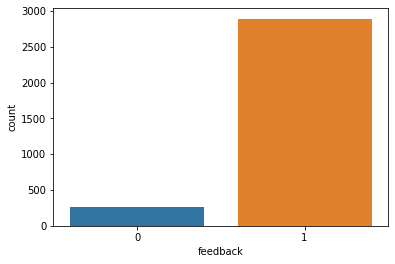

In [0]:
sns.countplot(df_alexa['feedback'], label = "Count") 

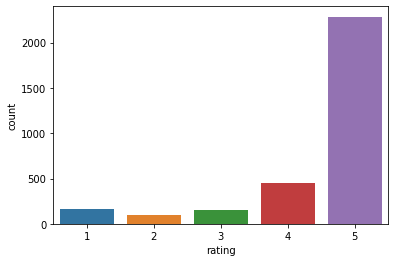

In [0]:
sns.countplot(x = 'rating', data = df_alexa)

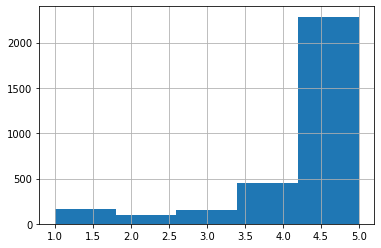

In [0]:
df_alexa['rating'].hist(bins = 5)

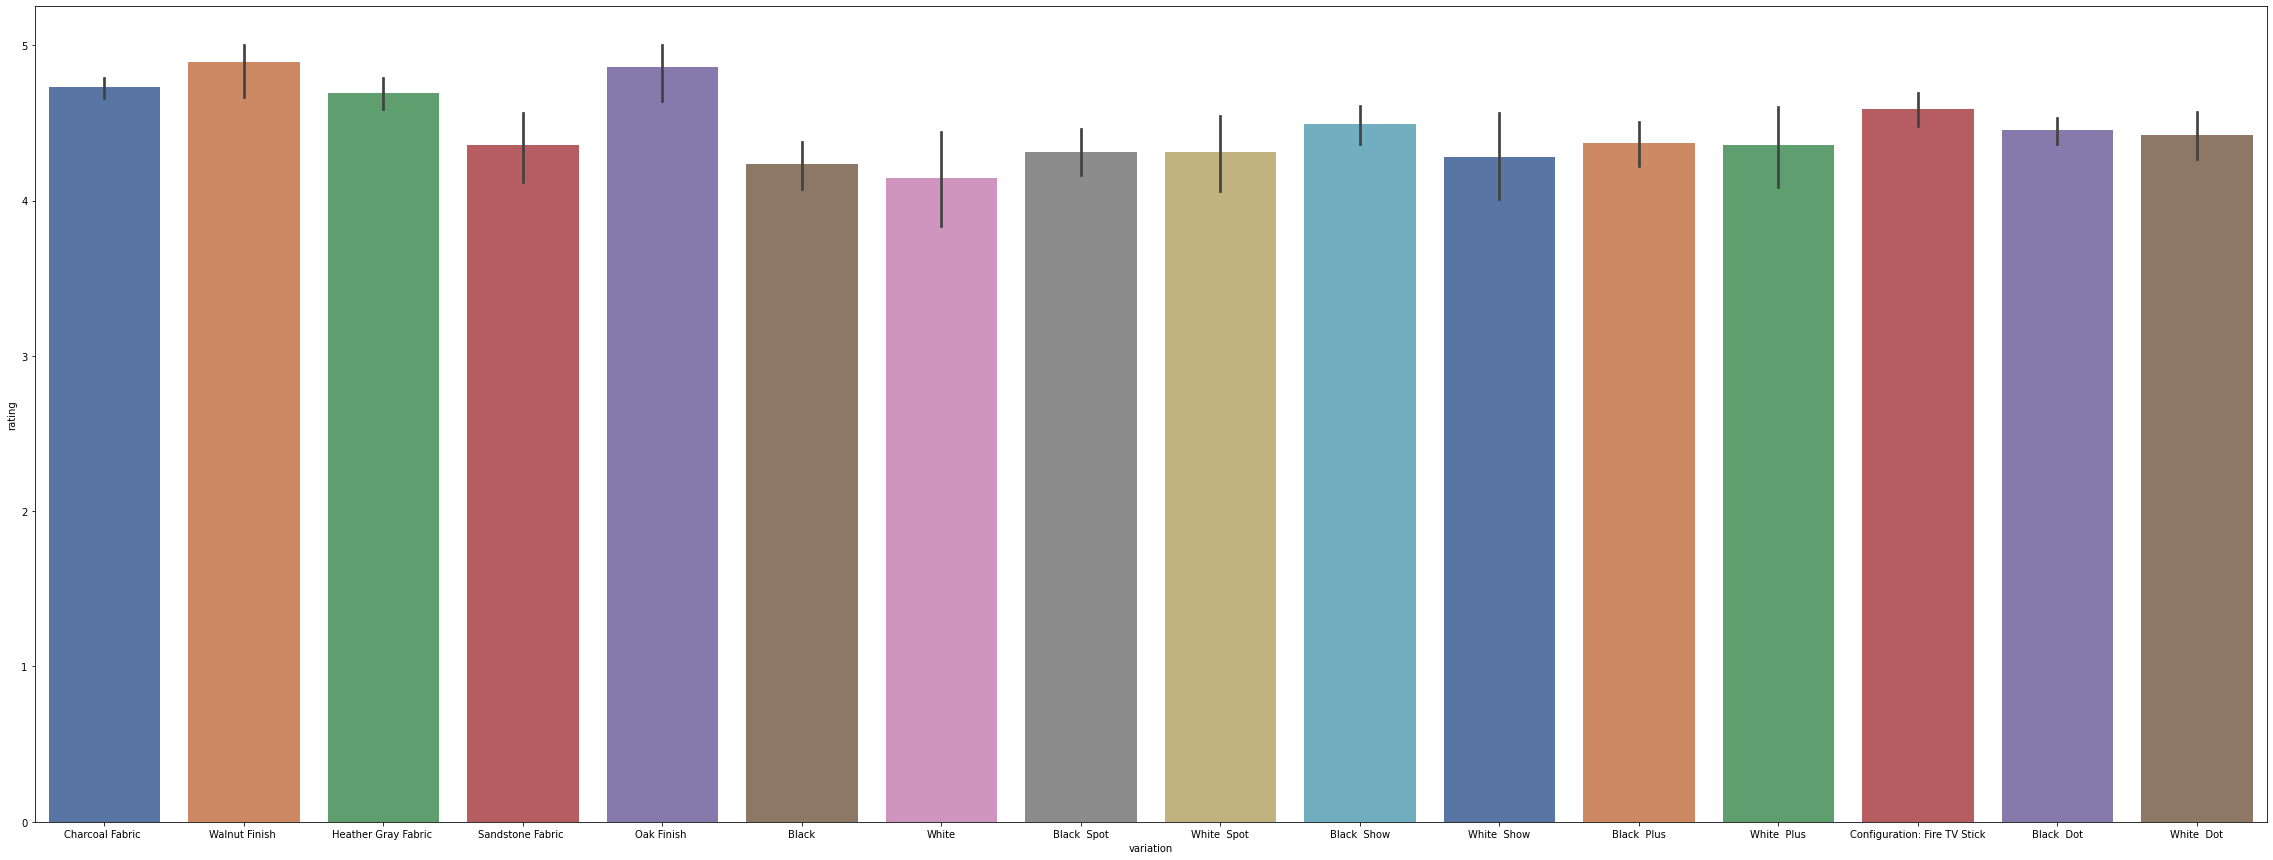

In [0]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')

# STEP #3: CLEAN UP THE DATA 

In [0]:
# Let's drop the date
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)


In [0]:
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [0]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True)

In [0]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
# first let's drop the column
df_alexa.drop(['variation'], axis=1, inplace=True)

In [0]:
# Now let's add the encoded column again
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [0]:
df_alexa

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Count Vectorizer (Tokenization) Example


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [0]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [0]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])


In [0]:
alexa_countvectorizer.shape

(3150, 4044)

In [0]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [0]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [0]:
print(alexa_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
# first let's drop the column
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())


In [0]:
# Now let's concatenate them together
df_alexa = pd.concat([df_alexa, reviews], axis=1)


In [0]:
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's drop the target label coloumns
X = df_alexa.drop(['feedback'],axis=1)


In [0]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y = df_alexa['feedback']

# STEP #4: TRAIN THE MODEL

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [0]:
X_train.shape

(2520, 4059)

In [0]:
X_test.shape

(630, 4059)

In [0]:
y_train.shape

(2520,)

In [0]:
y_test.shape

(630,)

In [0]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4059, )))

ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))

ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [0]:
ANN_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1624000   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [0]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs = 10)

Epoch 1/10
2520/2520 [==============================] - 1s 522us/sample - loss: 0.2696 - accuracy: 0.9214
Epoch 2/10
2520/2520 [==============================] - 1s 470us/sample - loss: 0.0856 - accuracy: 0.9683
Epoch 3/10
2520/2520 [==============================] - 1s 469us/sample - loss: 0.0319 - accuracy: 0.9893
Epoch 4/10
2520/2520 [==============================] - 1s 468us/sample - loss: 0.0186 - accuracy: 0.9944
Epoch 5/10
2520/2520 [==============================] - 1s 461us/sample - loss: 0.0167 - accuracy: 0.9944
Epoch 6/10
2520/2520 [==============================] - 1s 465us/sample - loss: 0.0162 - accuracy: 0.9948
Epoch 7/10
2520/2520 [==============================] - 1s 463us/sample - loss: 0.0159 - accuracy: 0.9937
Epoch 8/10
2520/2520 [==============================] - 1s 461us/sample - loss: 0.0158 - accuracy: 0.9940
Epoch 9/10
2520/2520 [==============================] - 1s 463us/sample - loss: 0.0150 - accuracy: 0.9944
Epoch 10/10
2520/2520 [=======================

# STEP#5: EVALUATING THE MODEL 

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


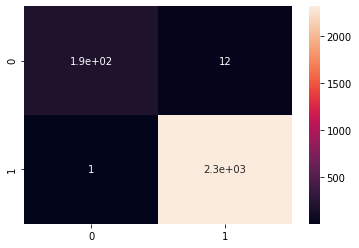

In [0]:
y_pred_train = ANN_classifier.predict(X_train)
y_pred_train

y_pred_train = (y_pred_train > 0.5)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

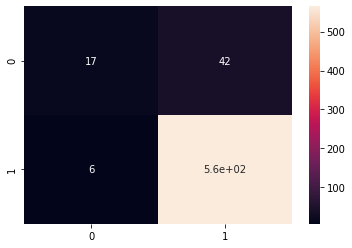

In [0]:
y_pred_test = ANN_classifier.predict(X_test)
y_pred_test

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [0]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

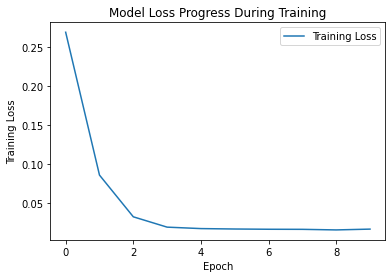

In [0]:
plt.plot(epochs_hist.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

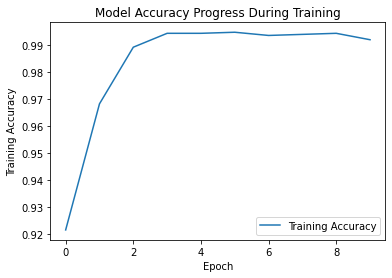

In [0]:
plt.plot(epochs_hist.history['accuracy'])

plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])